# Mandelbrot Set


In [1]:
%matplotlib inline  
import numpy as np
from math import sqrt, sin, pi
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import style

plt.rcParams["figure.figsize"]=(20,20) #sets the default image size
plt.rcParams["figure.dpi"]=(300)

### Mandelbrot Set Generation Function

In [2]:
# Mandelbrot Set Generation Function.
# The function generates an NxN density matrix for the generation of the 
#     mandelbrot Set within the parameter range.
# The iterative equation z'=z+c, where c=x+yi and z0=0+0i are the coanstant 
#     and initial z respectively. z' is iterated for a maximum of 100 times. 
#     Each iteration, the values is tested agianst the condition: |z'|>=2. 
#     If z' meets the condition, the iteration process ends, otherwise the 
#     iteration process will continue until the 100th iteration has been 
#     completed. After the iteration process, an output value is stored in 
#     the corresponding matrix location. The output value depends on the 
#     value of 'detail' parameter (True or False).
#         -A parameter of False outputs a matrix with binary values 0 or 1. A
#          value of 1 denotes the location is in the mandelbrot set, where a 
#          value of 0 denotes the location is not in the set. A z' output 
#          within the range of (0,2] is set as 0 and z'>=2 is set as 1.
#         -A parameter of True outputs a matrix with values >= 0. 
#          Any values >=2 are outside of the set, while any values in the 
#          range [0,2) are within the Mandelbrot set. The z' value is stored 
#          directly into the output matrix.
#          
# Default Parameters:
#     matrix size(NxN) : 500x500 units^2
#     x_min: -2 units
#     x_max:  2 units
#     y_min: -2 units
#     y_max:  2 units
#     detail: False
#
def mandelbrot(N=500, x_min=-2, x_max=2, y_min=-2, y_max=2, detail=False):
    
    # NxN matrix populated with zeros
    plot = np.zeros([N,N], dtype=float, order='C')
    
    # Divides the two axes into increments
    x_increments = abs((x_max - x_min)) / N
    y_increments = abs((y_max - y_min)) / N
    
    # Nested for loops for generating the image
    for a in range(N):
        for b in range(N):
                
            # point location on x-axis
            x_loc = x_min + x_increments * a
            # point location on y-axis
            y_loc = y_min + y_increments * b
            
            c = complex(x_loc, y_loc) #constant
            z = complex(0.0, 0.0) 
            i = 0 #counter
            
            # While loop iterates through z
            while(abs(z) <= 2 and i <= 100):
                z = z*z + c
                i+=1
                if(i > 100):
                    break
                if(abs(z) >=2.0):
                    break
            # Detail=False sets the color sceme to binary
            if detail == False:
                # >=2 indicates that the number is not in the set
                if(abs(z) >= 2.0):
                    plot[b][a] = 1
                # <2 indicates the number is in the set
                else:
                    plot[b][a] = 0
            # Detail=True sets the color scheme to continuous for |z| >=0
            else:
                '''# >=2 indicates that the number is not in the set
                if(abs(z) >= 2.0):
                    plot[b][a] += abs(z)
                # <2 indicates the number is in the set
                else:
                    plot[b][a] = 0'''
                
                plot[b][a] += abs(z)
    return plot

### Black/White Binary Detail Mandelbrot Set centered at (0,0)

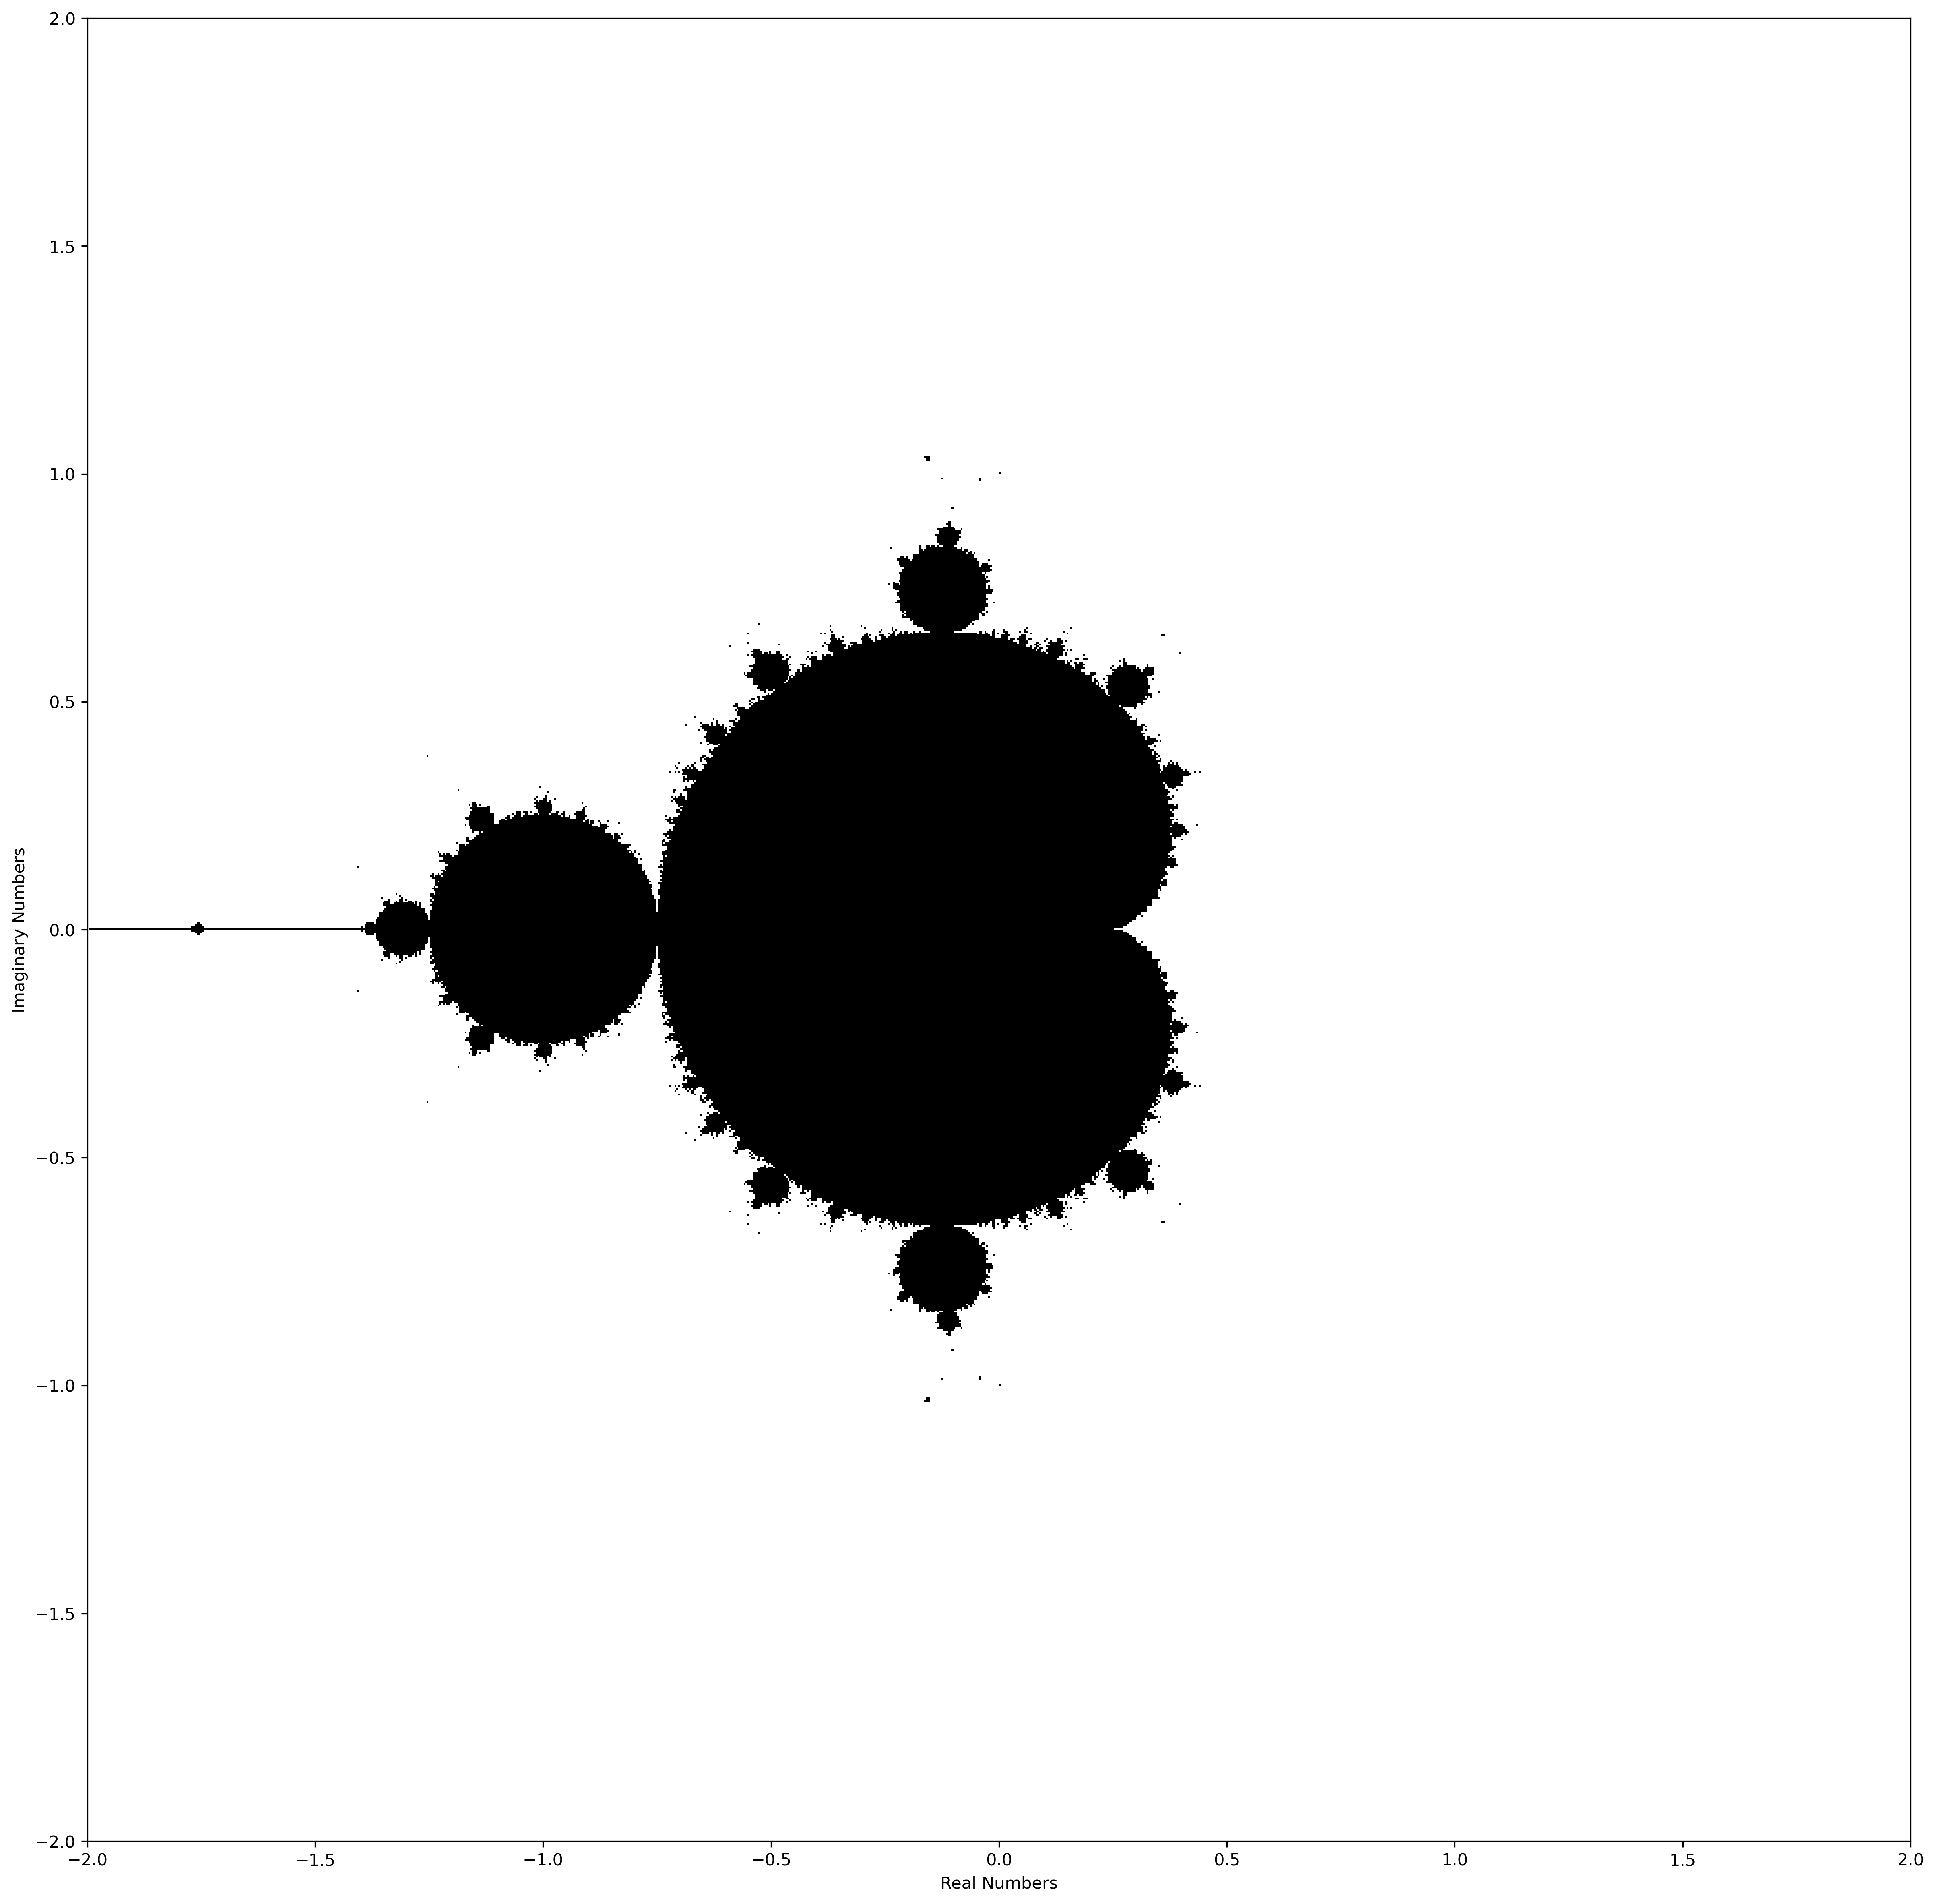

In [3]:
#plt.figure(dpi=300)

mand = mandelbrot(N=1000)

plt.imshow(mand, origin="lower",extent=[-2,2,-2,2])
plt.xlabel("Real Numbers")
plt.ylabel("Imaginary Numbers")
plt.gray()
plt.show()

### Color Detail Mandelbrot Set centered at (0,0)

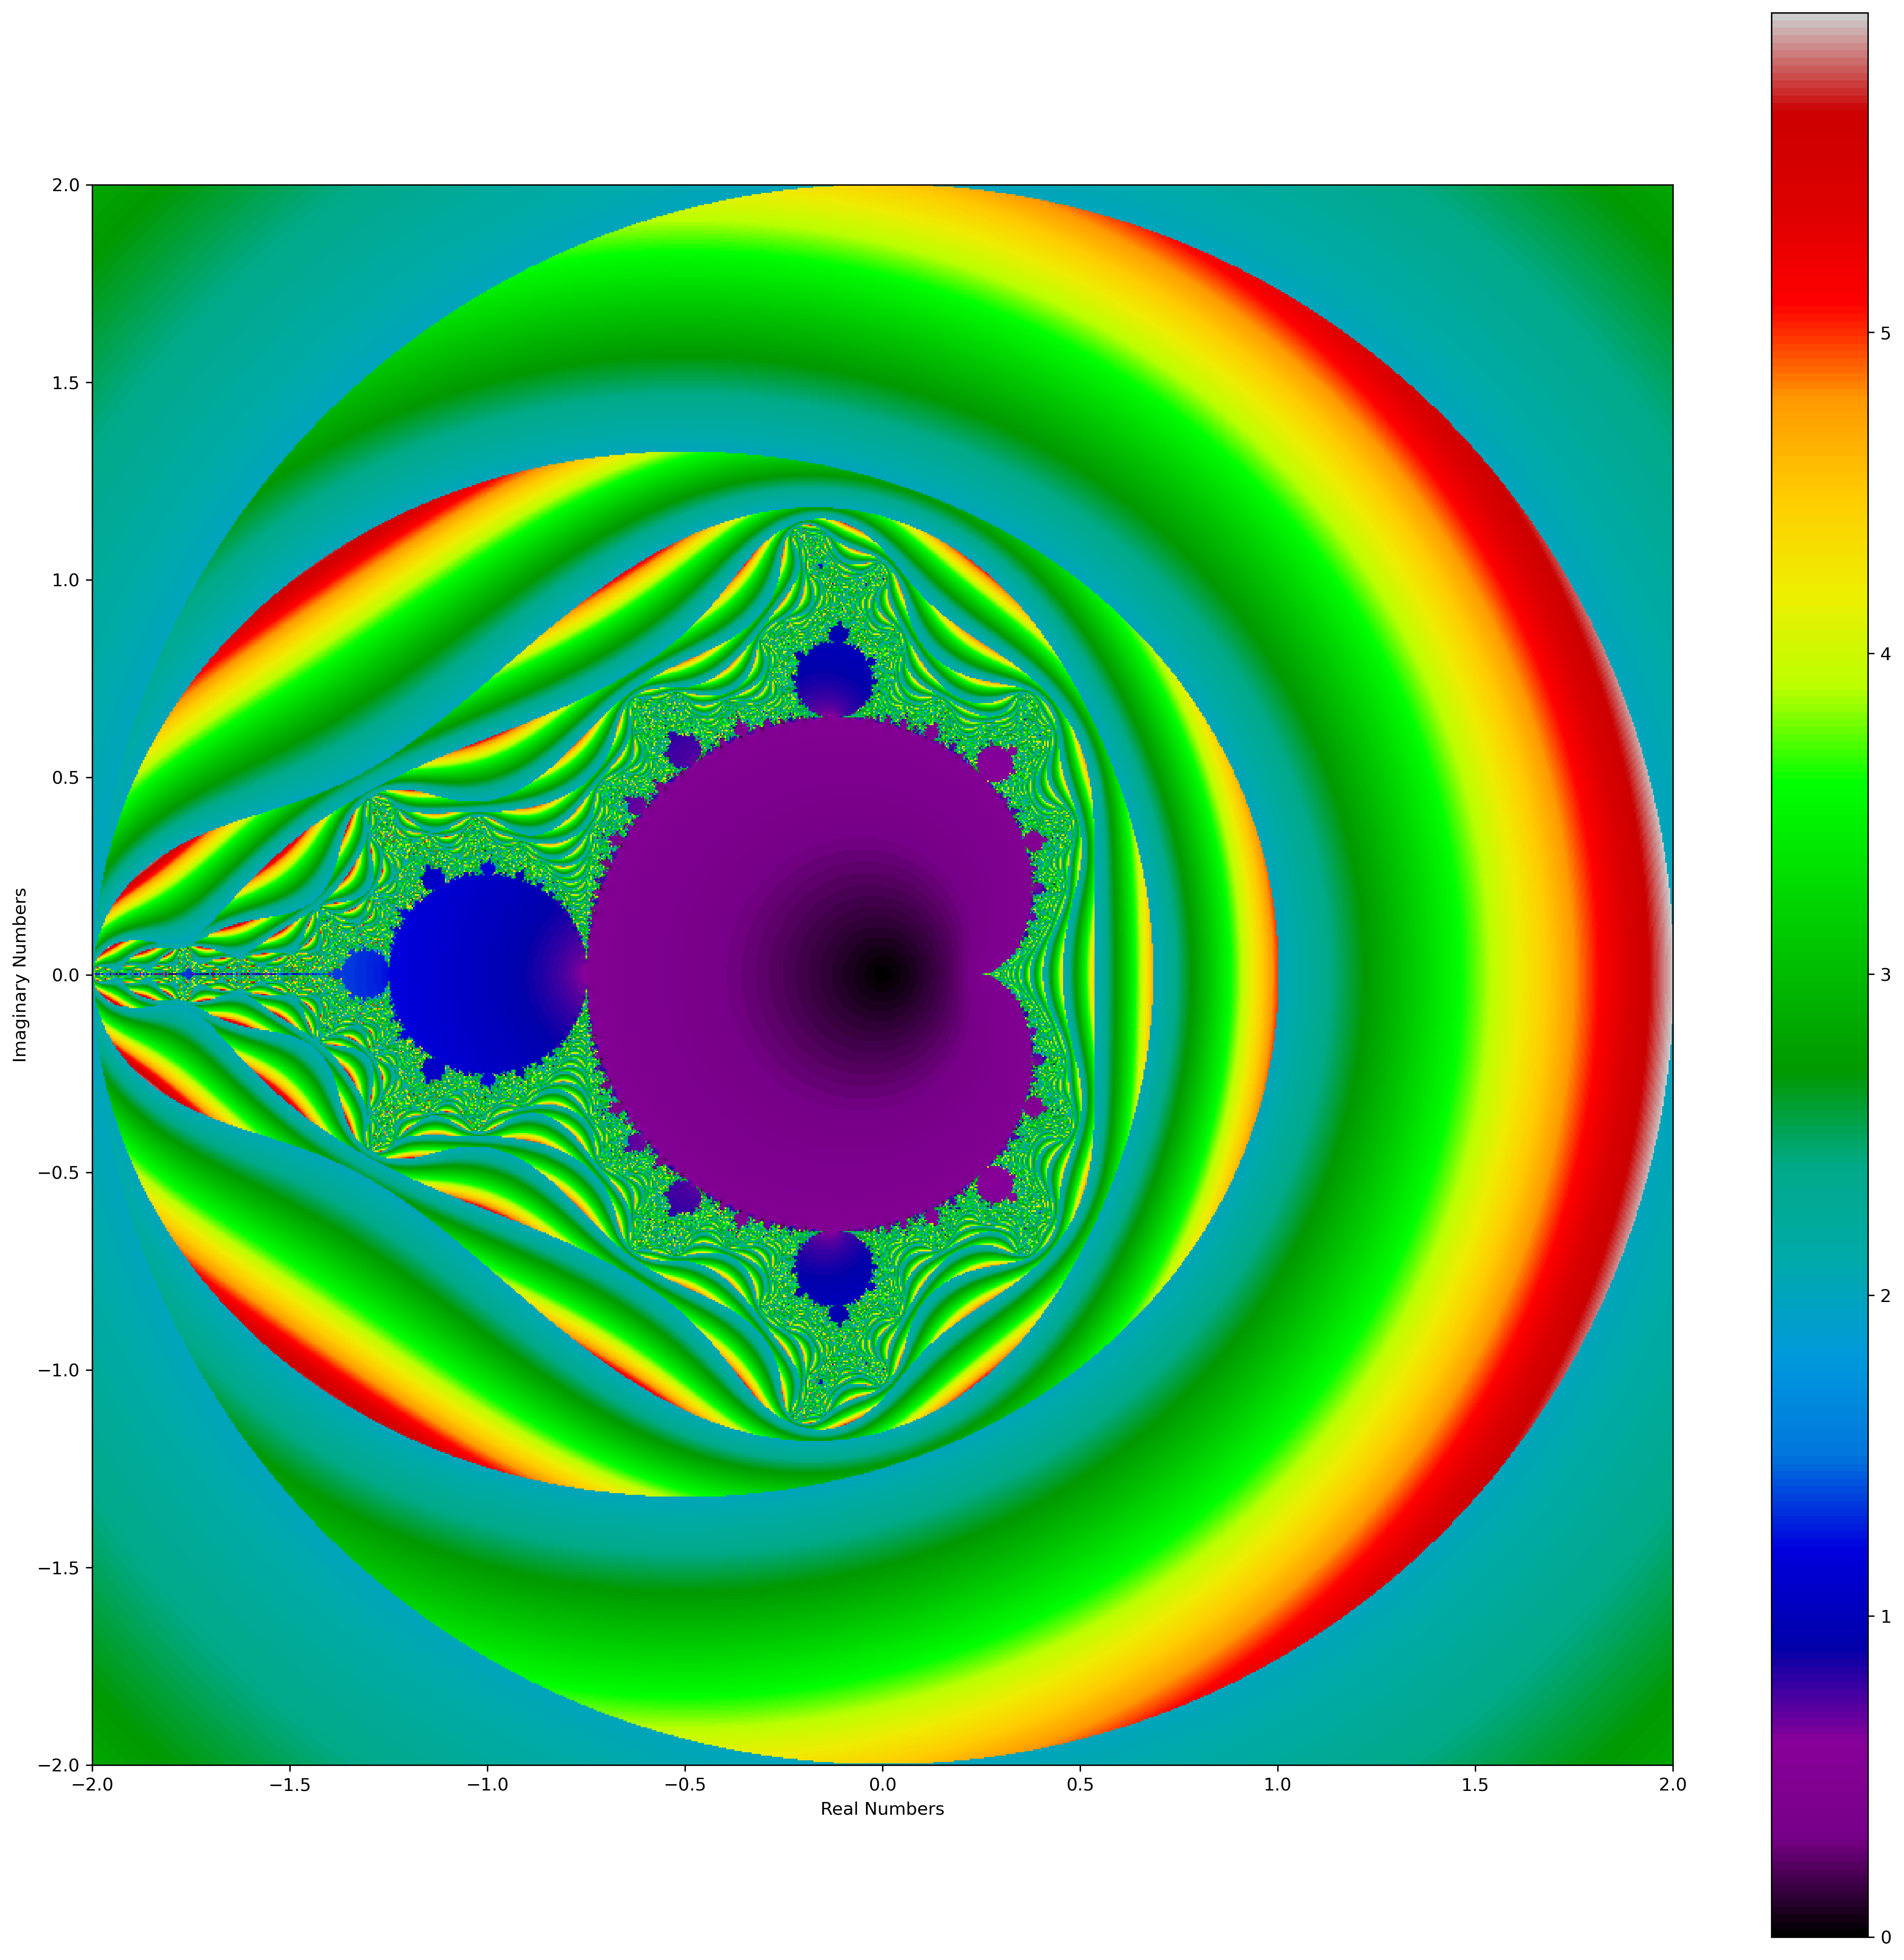

In [4]:
plt.figure(dpi=300)

mand_color = mandelbrot(N=1000, detail=True)

plt.imshow(mand_color, origin="lower",extent=[-2,2,-2,2])
plt.nipy_spectral() #colormap
plt.colorbar() #displays the colorbar
plt.xlabel("Real Numbers")
plt.ylabel("Imaginary Numbers")
plt.show()

### Black/White Detail Mandelbrot Set centered at (0,0)

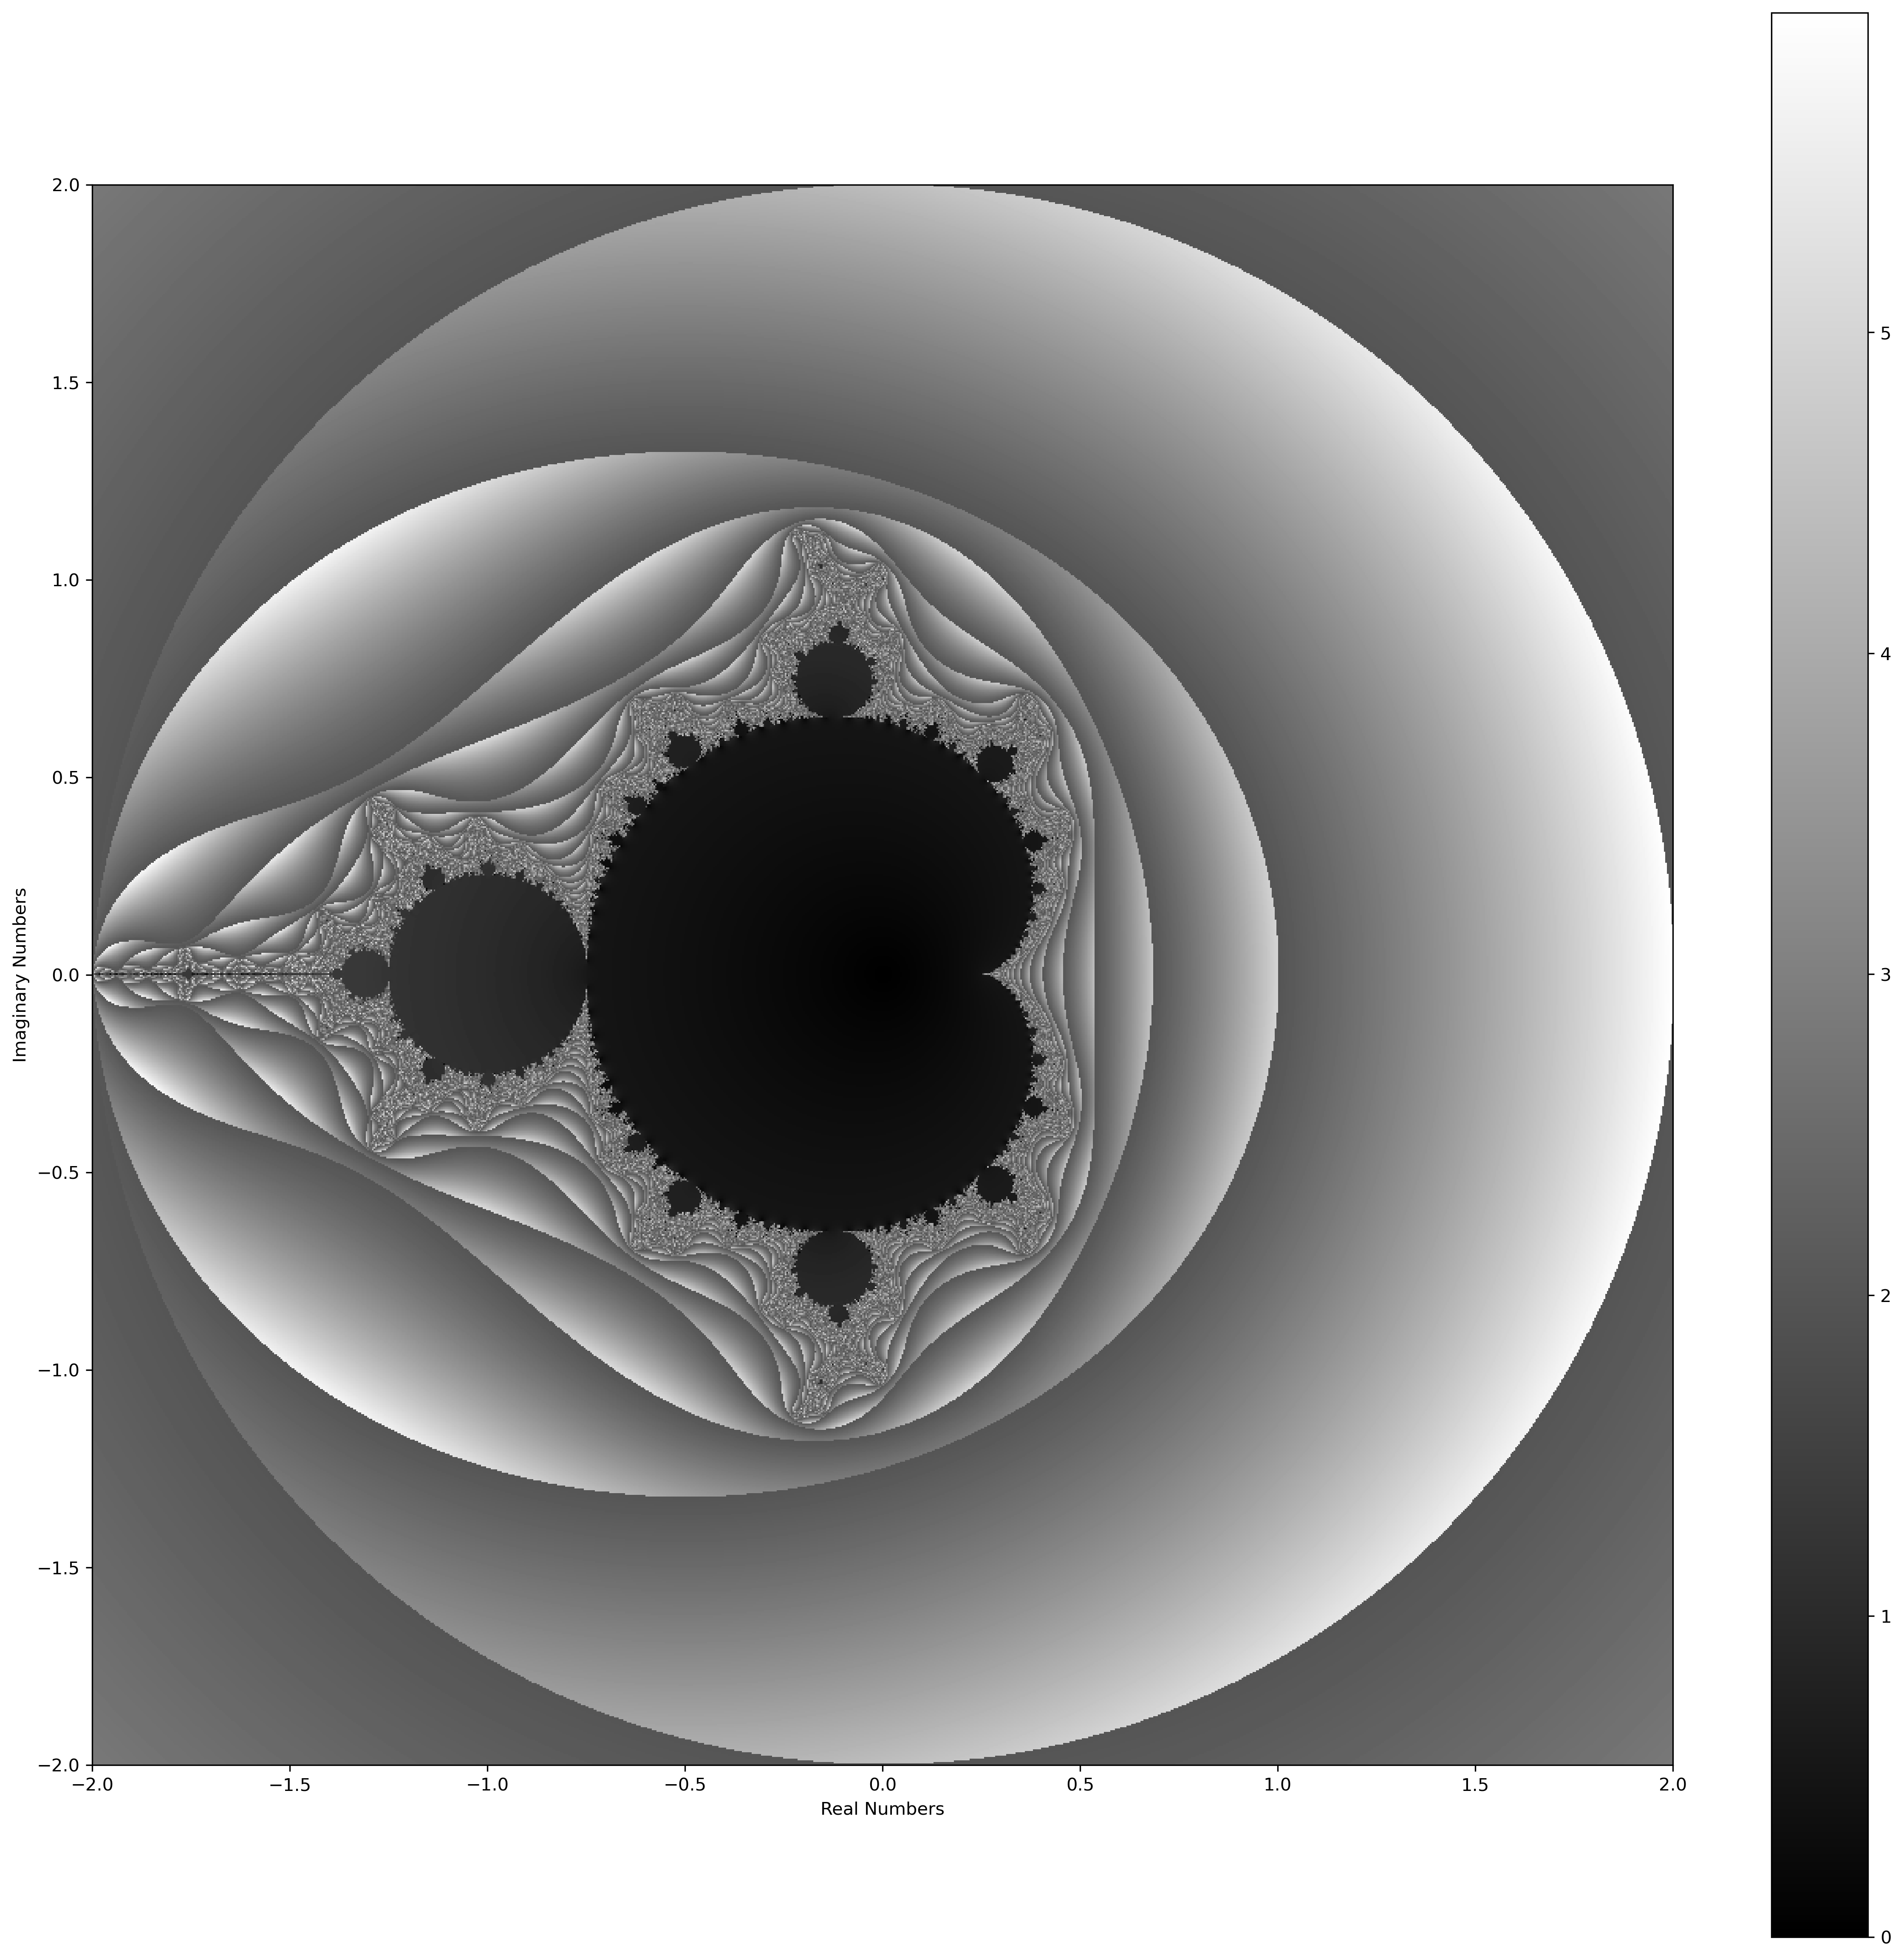

In [5]:
plt.imshow(mand_color, origin="lower",extent=[-2,2,-2,2])
plt.colorbar() #displays the colorbar
plt.xlabel("Real Numbers")
plt.ylabel("Imaginary Numbers")
plt.gray()
plt.show()

### Zoomed in Color Detail Mandelbrot Set 
### centered at (-1.9415,0)

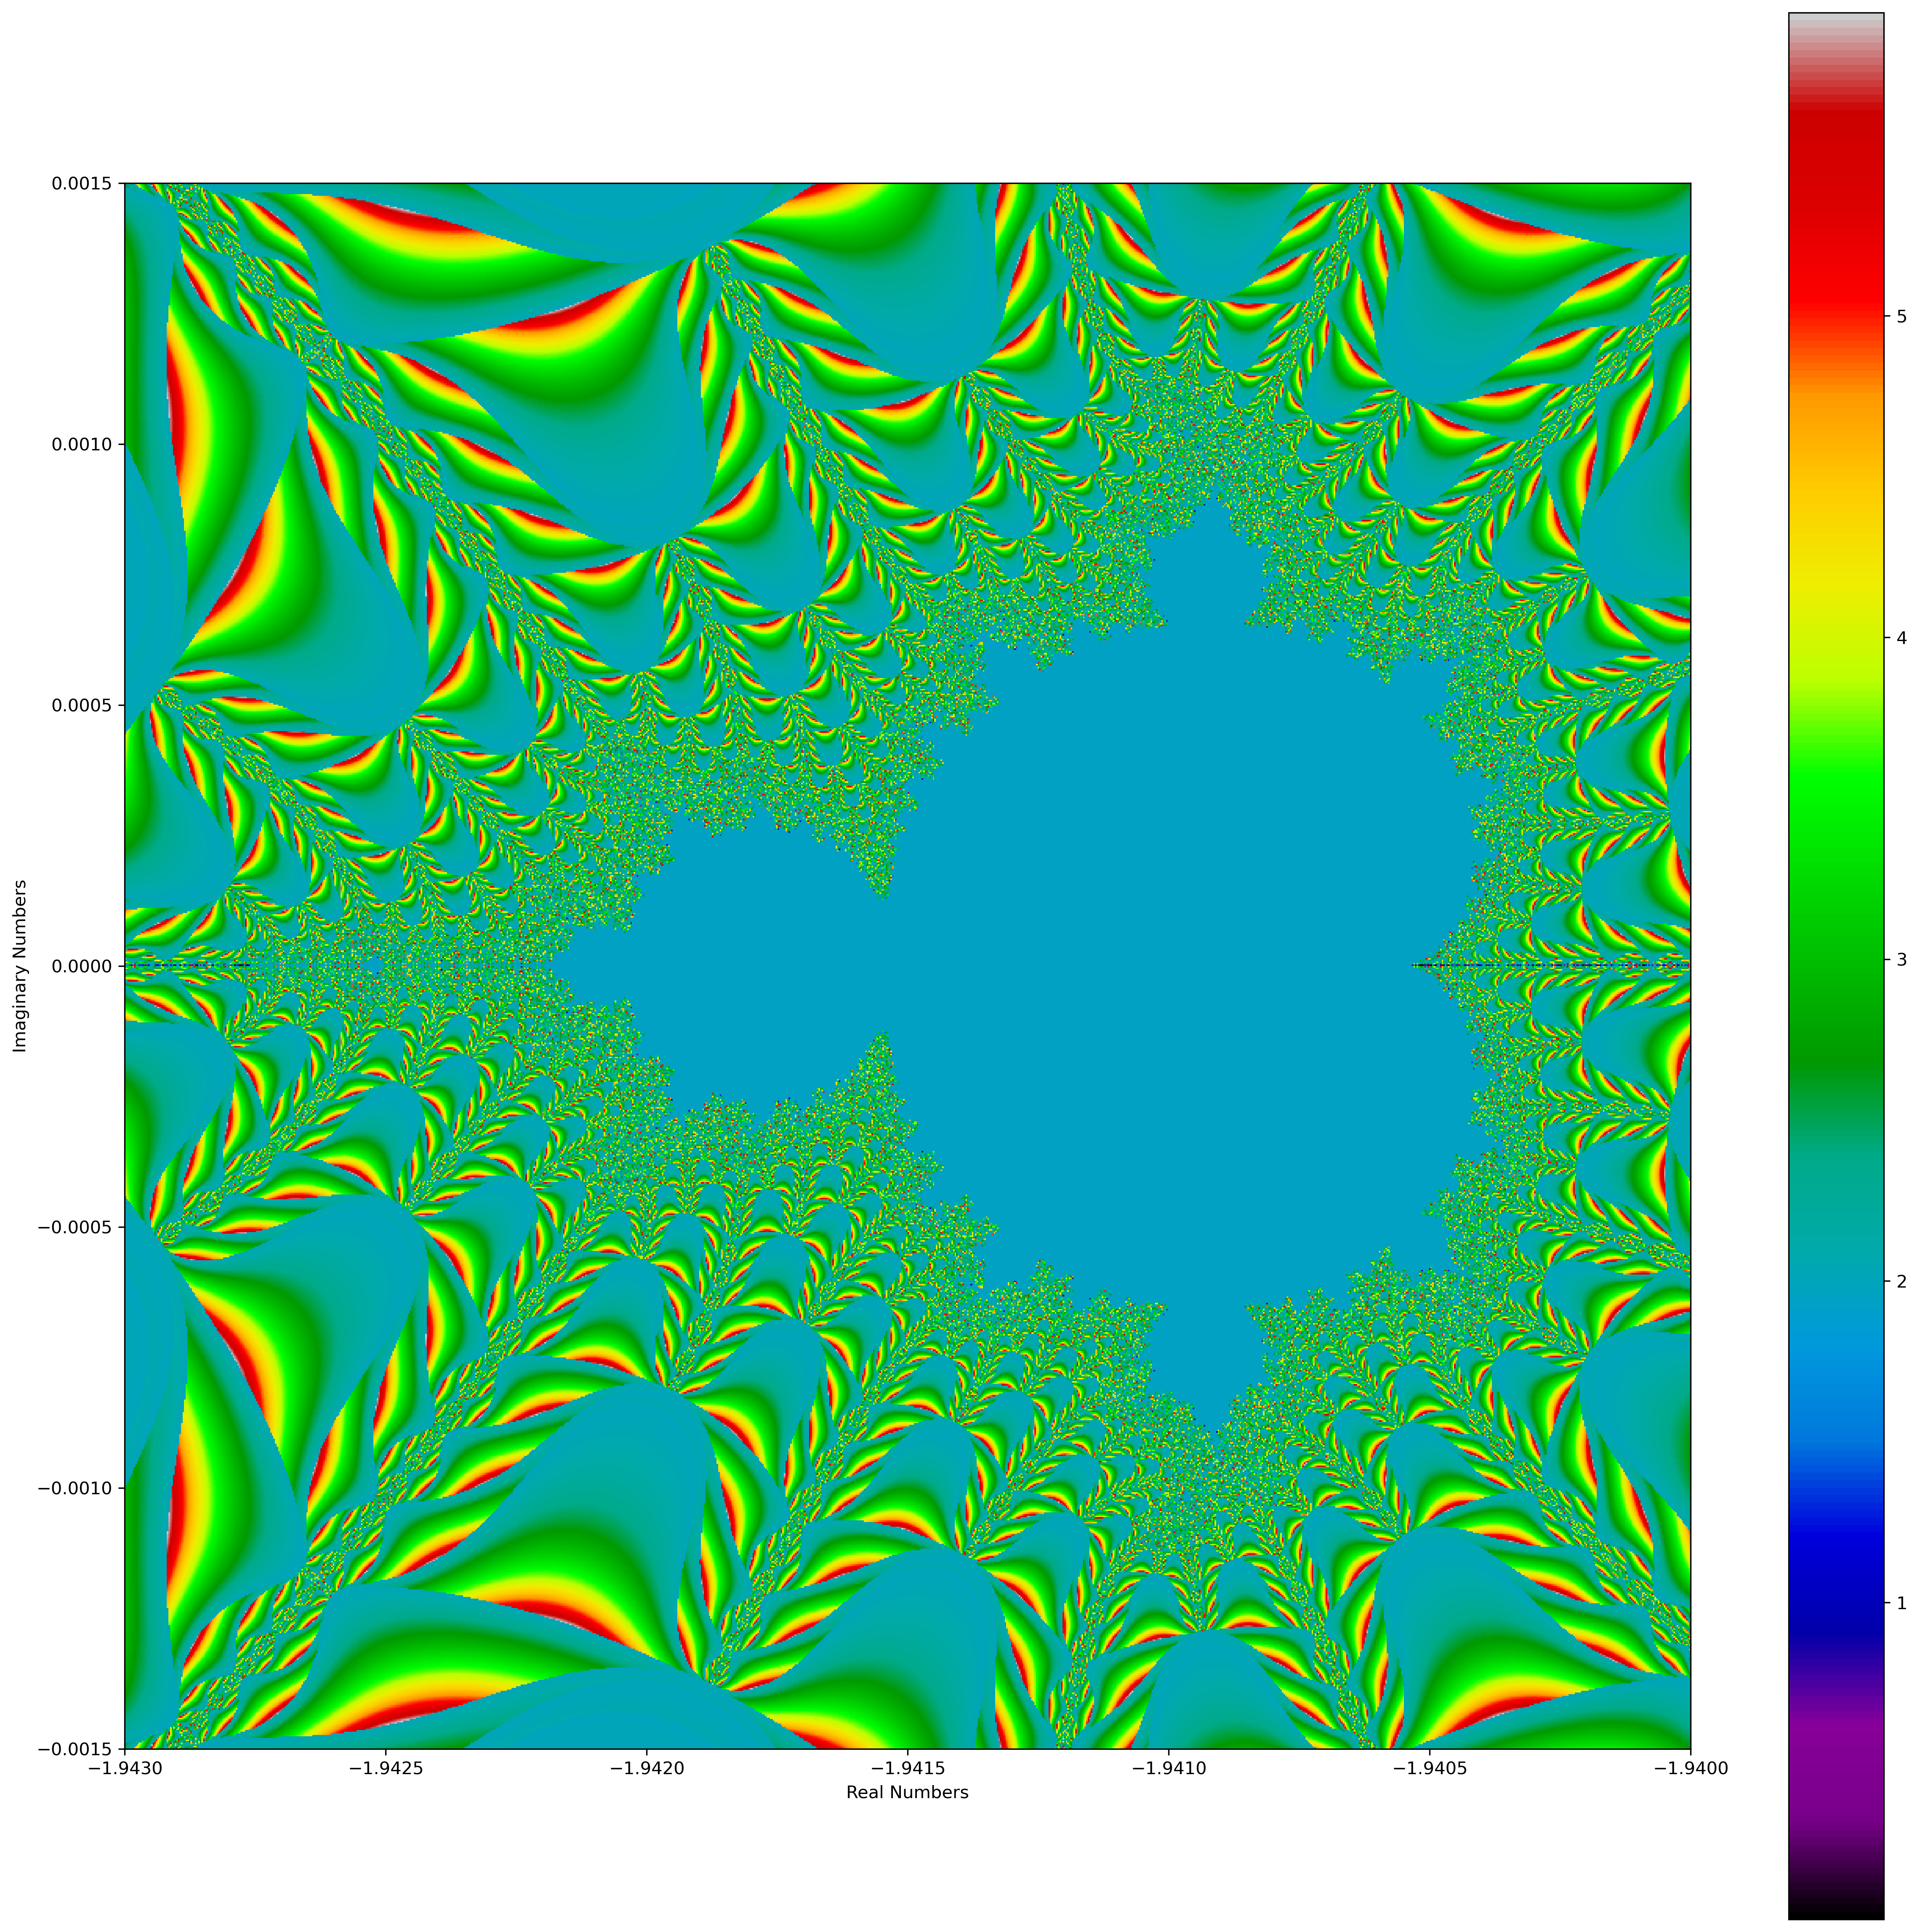

In [6]:
# Parameters for the function
xmin=-1.943
xmax=-1.940
ymin=-.0015
ymax=.0015

mand_zoom = mandelbrot(N=1000, x_min=xmin, x_max=xmax, y_min=ymin, y_max=ymax,
                       detail=True)

plt.figure(dpi=300)
plt.imshow(mand_zoom, origin="lower",extent=[xmin,xmax,ymin,ymax])
plt.nipy_spectral()
plt.colorbar()
plt.xlabel("Real Numbers")
plt.ylabel("Imaginary Numbers")
plt.show()

### Zoomed in Black/White Detail Mandelbrot Set 
### centered at (-1.9415,0)

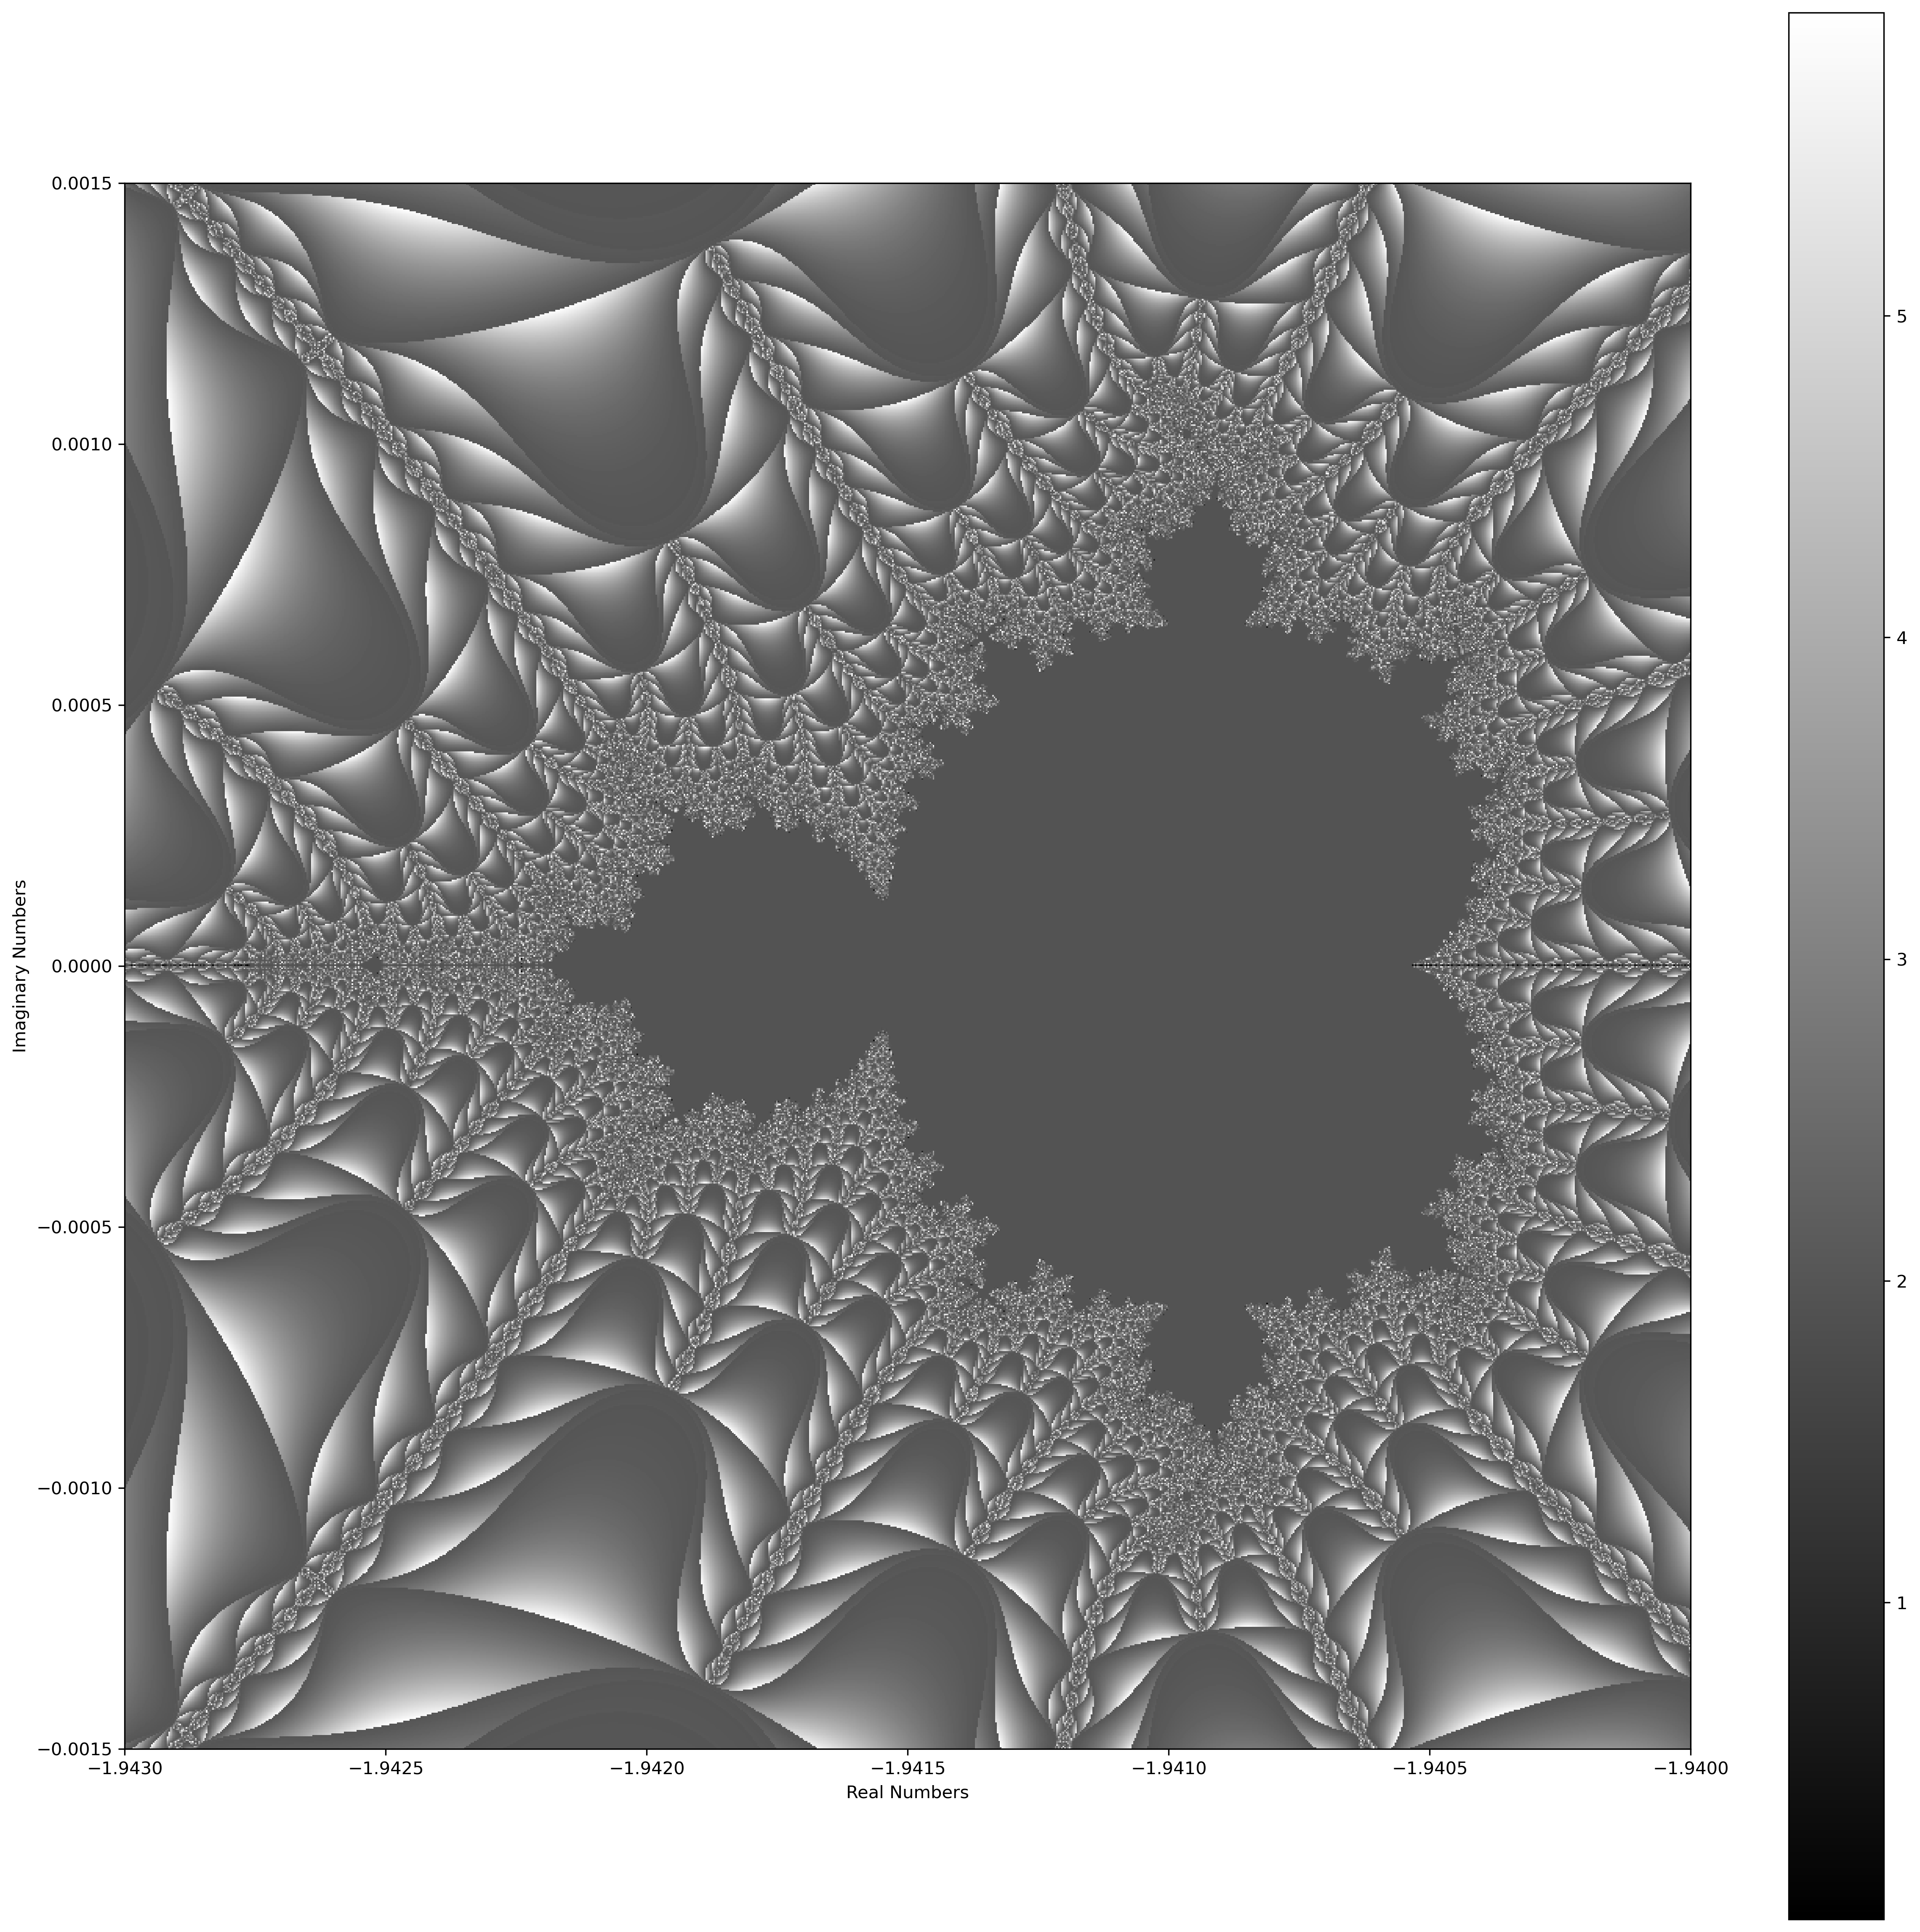

In [7]:
plt.figure(dpi=300)
plt.imshow(mand_zoom, origin="lower",extent=[xmin,xmax,ymin,ymax])
plt.colorbar() #displays the colorbar
plt.xlabel("Real Numbers")
plt.ylabel("Imaginary Numbers")
plt.gray()
plt.show()

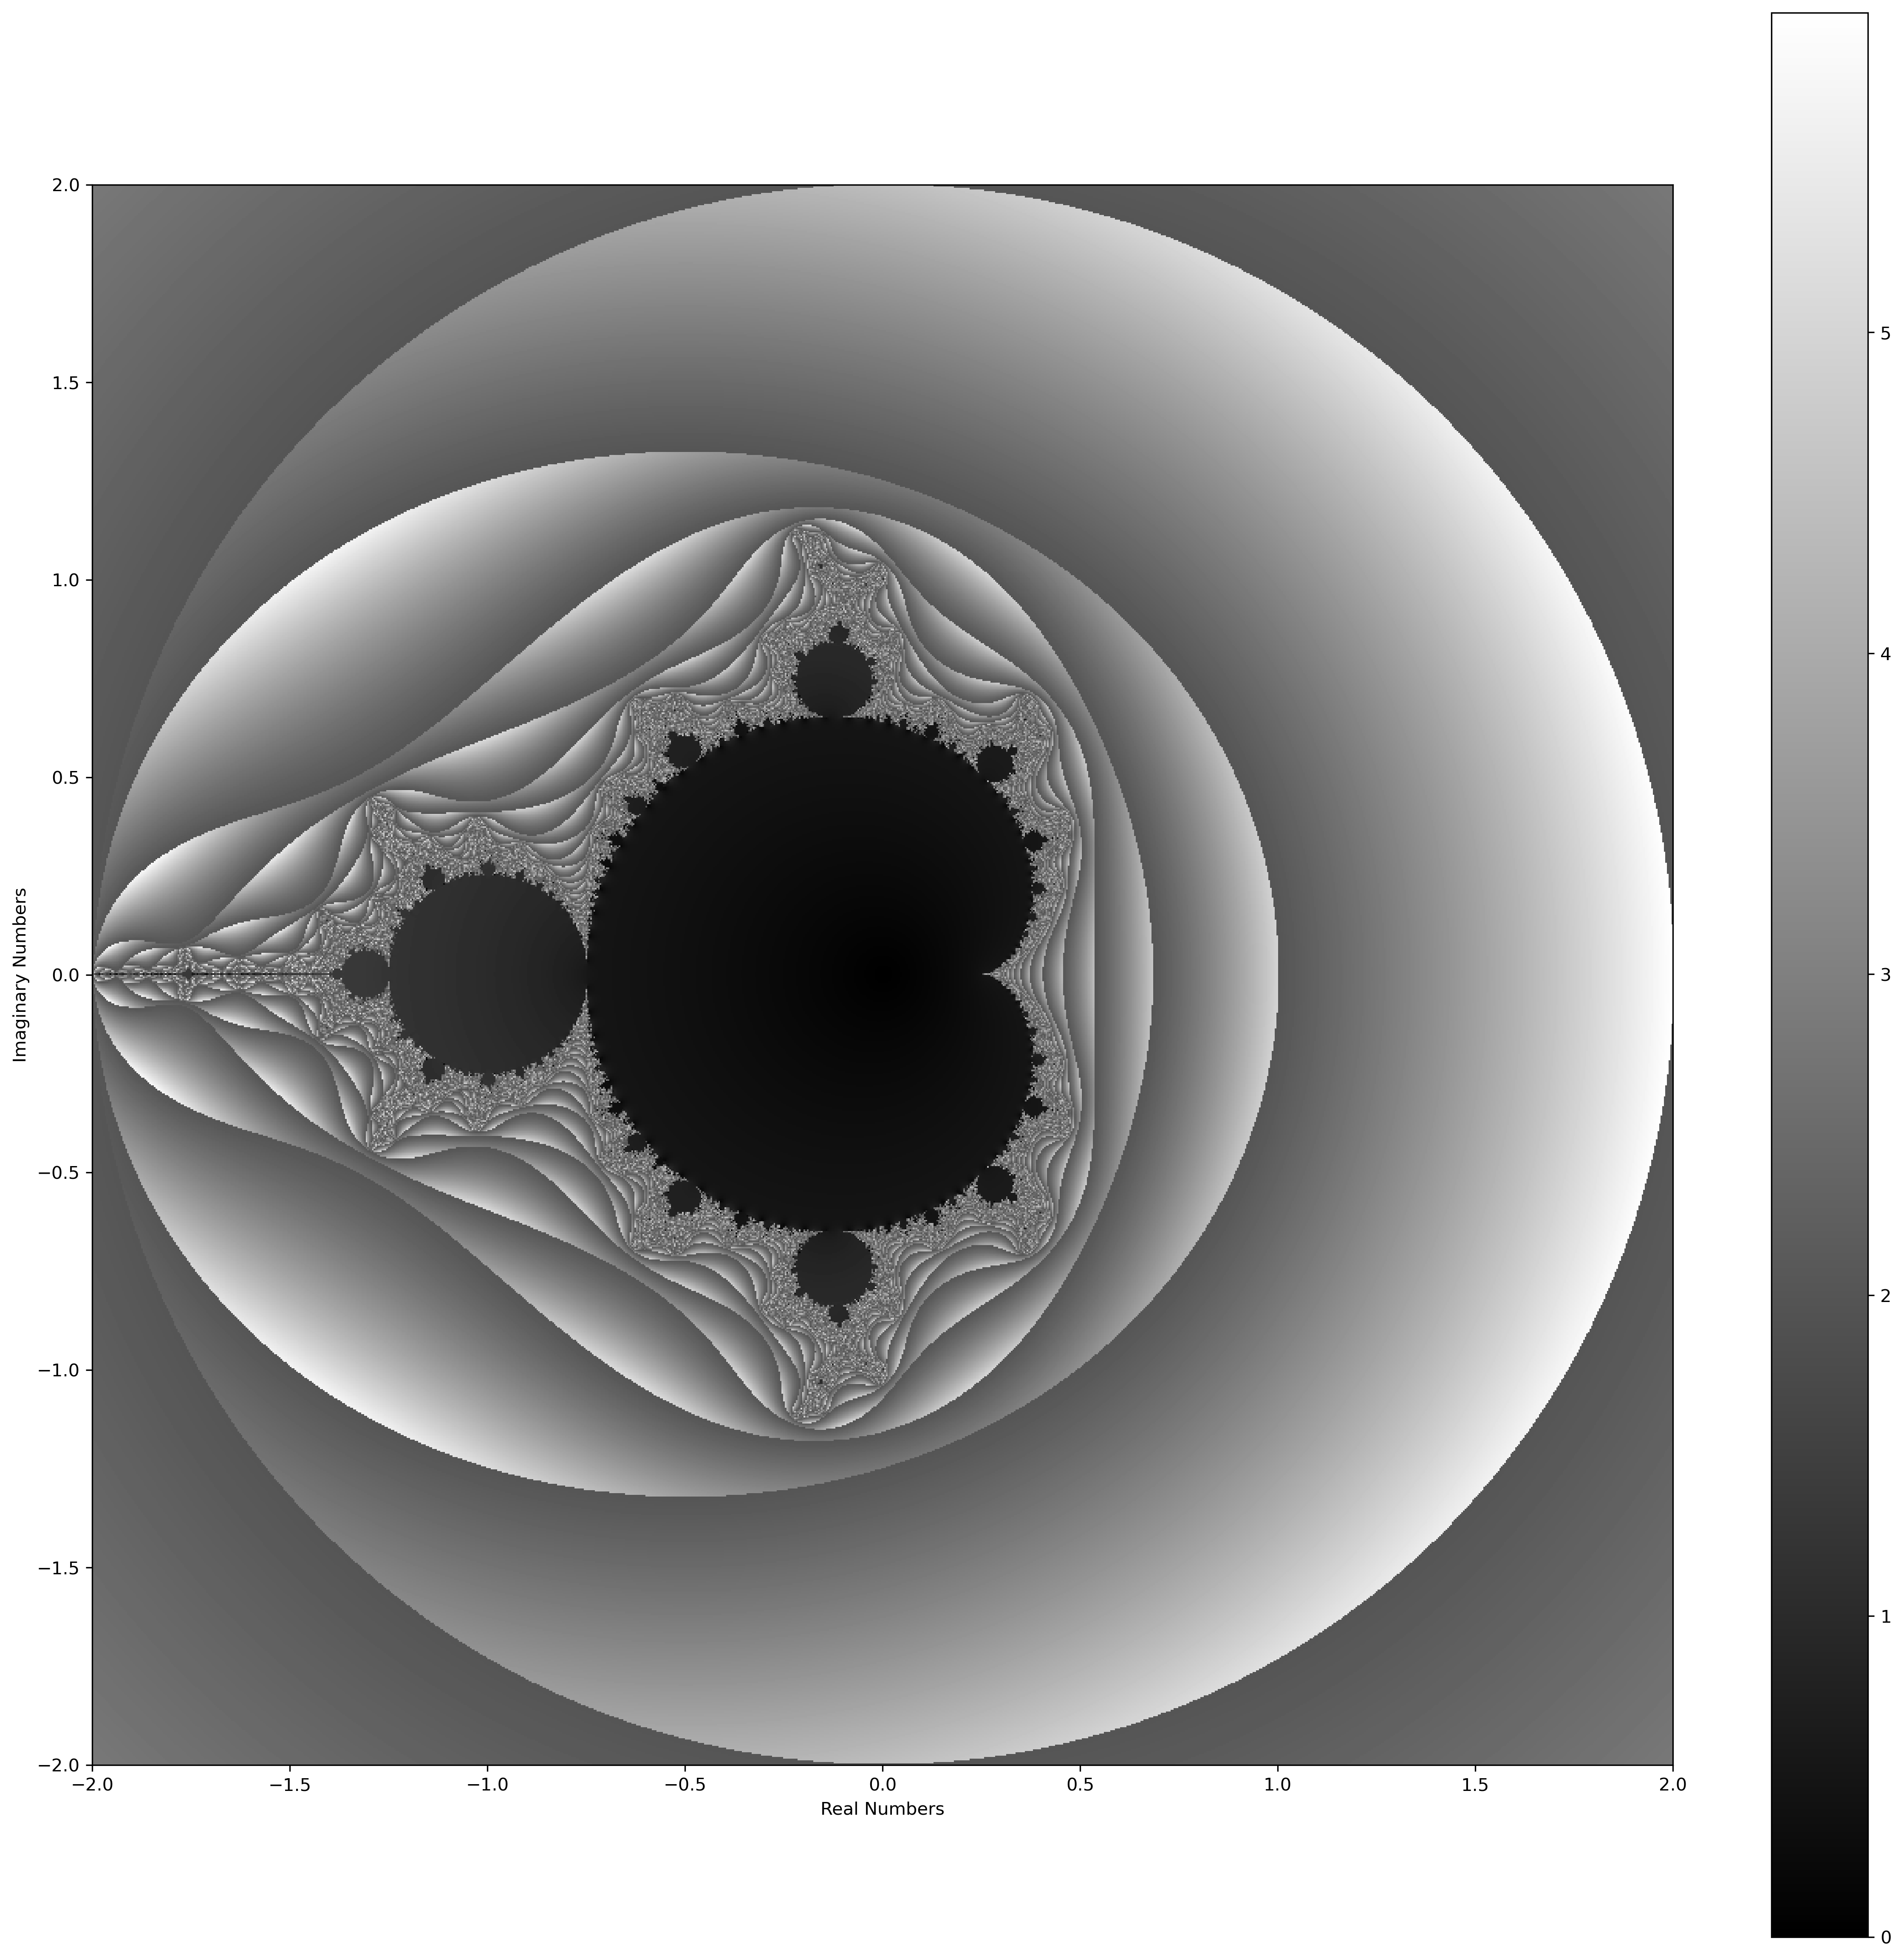

In [8]:
mand_detail_b_w=mandelbrot(N=1000,detail=True)

plt.figure(dpi=300)
plt.imshow(mand_detail_b_w, origin="lower",extent=[-2,2,-2,2])
plt.colorbar() #displays the colorbar
plt.xlabel("Real Numbers")
plt.ylabel("Imaginary Numbers")
plt.gray()
plt.show()

# Wave Interference

In [9]:
%matplotlib inline  
import numpy as np
from math import sqrt, sin, pi
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style

#plt.rcParams["figure.figsize"]=(10,10)

In [10]:
points = 500
x_ax = 100
y_ax = 100

x1 = 40
y1 = 50
x2 = 60
y2 = 50
x3 = -100
y3 = -100

amplitude = 1
wavelength = 5

In [11]:
# Wave Propogation Function.
# The function generates an mxn density matrix for wave propgation centered 
#    at the input location (x_loc, y_loc).
# Matrix addition/subtraction and scalr multiplication are all valid 
#    operations, and will generate interference patterns
# Default Wave Properties:
#    propogation location (x_loc, y_loc): (50 units, 50 units)
#    amplitude: 1 unit
#    wavelength: 5 units
#
# Default Space Properties:
#    matrix size(mxn) : 500x500 units^2
#    x-axis range (x_axis): 100 units
#    y-axis range (y_axis): 100 units
#    origin: (0,0)
#    x-increments (x-axis/n): 0.2 units
#    y-increments (y-axis/m): 0.2 units
#    
# Note: the propogation point is not required to be located within the range 
#    of the space.
def generate_waves(x_loc=50, y_loc=50, amplitude=1, wavelength=5, x_axis=100,
                   y_axis=100, m=500, n=500):
    #creates the empty array to hold the wave heights
    plot = np.zeros([m,n], dtype=float, order='C')
    
    # increment spacing for the x and y axis respectively
    x_increments = x_axis / n
    y_increments = y_axis / m
    
    # wavevector
    k = 2*pi/wavelength
    
    # for loop to generate the points for the array
    for i in range(m):
        for j in range(n):
            # point location on x-axis
            x = x_increments * j
            # point location on y-axis
            y = y_increments * i
            # distance to wave origin
            r = sqrt((x - x_loc)**2 + (y - y_loc)**2)
            # wave height at point
            h = amplitude*sin(k*r)
            # inputs wave height into the plot matrix
            plot[i][j] += h
    
    #returns the generated plot
    return plot

In [12]:
wave1 = generate_waves(x1, y1)
wave2 = generate_waves(x2, y2)
wave3 = generate_waves(x3, y3)

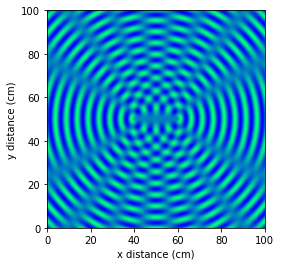

In [13]:
plt.imshow(wave1+wave2, origin="lower",extent=[0,x_ax,0,y_ax])
plt.winter()
plt.xlabel('x distance (cm)')
plt.ylabel('y distance (cm)')
plt.show()

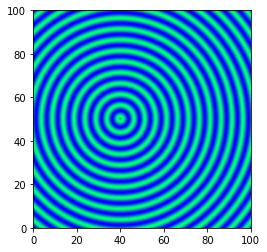

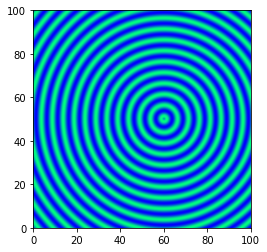

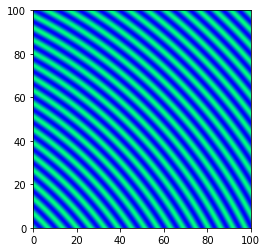

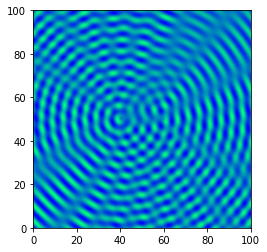

In [14]:
plt.imshow(wave1, origin="lower",extent=[0,x_ax,0,y_ax])
plt.winter()
plt.show()

plt.imshow(wave2, origin="lower",extent=[0,x_ax,0,y_ax])
plt.winter()
plt.show()

plt.imshow(wave3, origin="lower",extent=[0,x_ax,0,y_ax])
plt.winter()
plt.show()

# Matrix addition
combined_waves = 2*wave1 + wave2 - wave3
plt.imshow(combined_waves, origin="lower",extent=[0,x_ax,0,y_ax])
plt.winter()
plt.show()

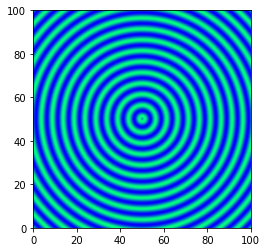

In [15]:
#Default Wave
wave_default = generate_waves()
plt.imshow(wave_default, origin="lower",extent=[0,x_ax,0,y_ax])
plt.winter()
plt.show()

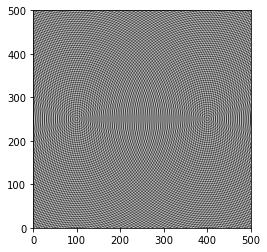

In [16]:
# Large Wave Spaces
wave_large = generate_waves(x_loc=100, y_loc=250, amplitude = 10,x_axis=500,
                            y_axis=500,m=2500,n=2500)
wave_large2 = generate_waves(x_loc=400, y_loc=250,amplitude = 10,x_axis=500,
                             y_axis=500,m=2500,n=2500)
plt.imshow(wave_large + wave_large2, origin="lower",extent=[0,500,0,500])
plt.gray()
plt.show()

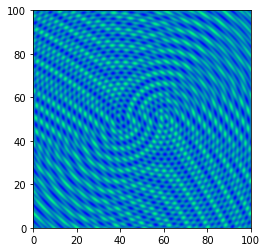

In [17]:
# Matrix Multiplication
plt.imshow(wave1*wave2*wave3, origin="lower",extent=[0,x_ax,0,y_ax])
plt.winter()
plt.show()


In [18]:
# Utilizing the help functionality
help(generate_waves)

Help on function generate_waves in module __main__:

generate_waves(x_loc=50, y_loc=50, amplitude=1, wavelength=5, x_axis=100, y_axis=100, m=500, n=500)
    # Wave Propogation Function.
    # The function generates an mxn density matrix for wave propgation centered 
    #    at the input location (x_loc, y_loc).
    # Matrix addition/subtraction and scalr multiplication are all valid 
    #    operations, and will generate interference patterns
    # Default Wave Properties:
    #    propogation location (x_loc, y_loc): (50 units, 50 units)
    #    amplitude: 1 unit
    #    wavelength: 5 units
    #
    # Default Space Properties:
    #    matrix size(mxn) : 500x500 units^2
    #    x-axis range (x_axis): 100 units
    #    y-axis range (y_axis): 100 units
    #    origin: (0,0)
    #    x-increments (x-axis/n): 0.2 units
    #    y-increments (y-axis/m): 0.2 units
    #    
    # Note: the propogation point is not required to be located within the range 
    #    of the space.

